<a href="https://colab.research.google.com/github/BaharehAm/Python-tutorials-for-Advanced-Data-Mining/blob/main/Tutorial_6_ANN%2C_RBFNN%2C_PNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# from sklearn import metrics
from sklearn.model_selection import train_test_split


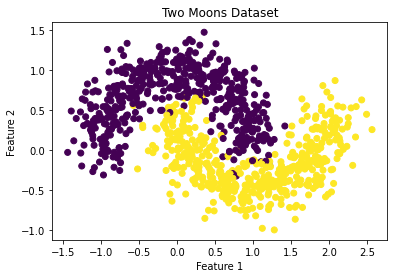

In [ ]:
# Generate two moons dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X, y
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Plot two moons dataset
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two Moons Dataset')
plt.show()

In [ ]:
X

array([[-0.11166654,  0.52022374],
       [ 1.14264982, -0.34257734],
       [ 0.79555796, -0.01144231],
       ...,
       [ 1.72760808, -0.42882943],
       [-1.01448644,  0.13522904],
       [ 0.77438101,  0.63428493]])

## ANN

An **Artificial Neural Network (ANN)** is a type of machine learning algorithm that is designed to simulate the behavior of the human brain. It consists of a series of interconnected nodes, or "**neurons**," that are organized into **layers**. The neurons in the **input layer** receive data, which is then processed by the neurons in the **hidden layers** before being outputted by the neurons in the **output layer**.

Each neuron in an ANN receives input from other neurons and applies a mathematical function to that input to determine its output. The strength of the connections between neurons, known as **weights**, is adjusted during training to improve the accuracy of the network's predictions.

An **activation function** is a mathematical function that is applied to the output of each neuron in an Artificial Neural Network (ANN) to introduce non-linearity in the model. The purpose of the activation function is to determine the output of the neuron based on the weighted sum of the inputs received from other neurons.



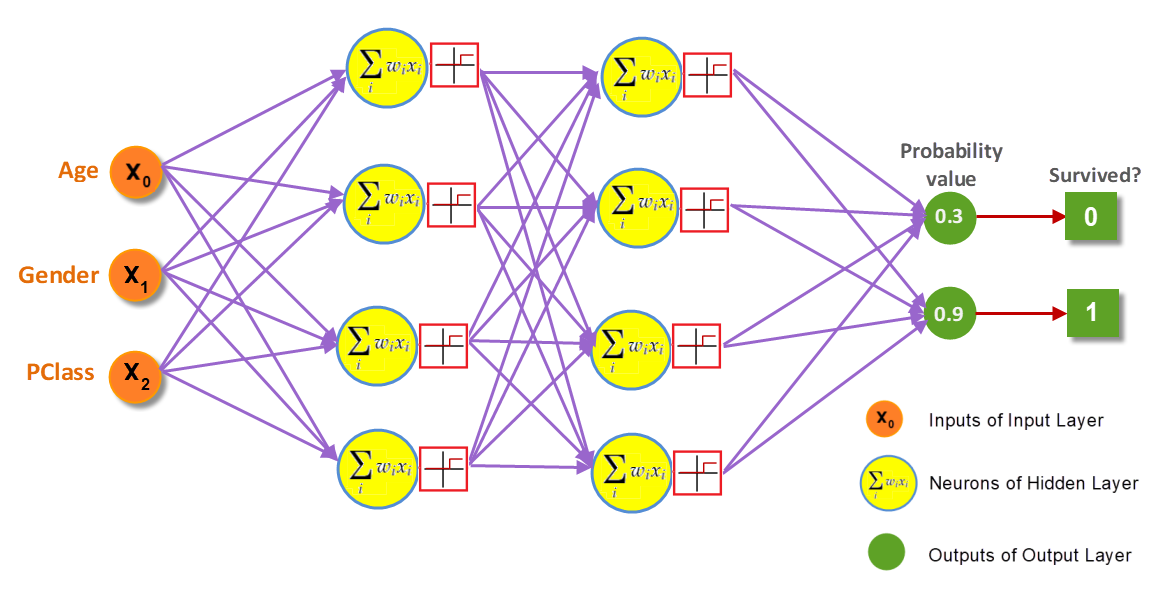
[Ref](https://devskrol.com/2020/11/22/388/)

The **activation function** is a critical component of an ANN, as it helps the network learn and make accurate predictions. Without an activation function, the output of the neurons would be a linear combination of the input, which is not suitable for modeling complex relationships between variables.

There are several types of activation functions used in ANNs, including:

**Sigmoid (logistic)**: Maps any input to a value between 0 and 1, which is useful for binary classification problems.

**ReLU** (Rectified Linear Unit): Sets negative inputs to zero and passes positive inputs through, which is useful for improving training times and avoiding the vanishing gradient problem.

**Tanh** (Hyperbolic tangent): Similar to the sigmoid function, but maps input values to a range between -1 and 1.

**Softmax**: Used for multi-class classification problems and maps inputs to a probability distribution over multiple classes.

**Linear**: Given an input value x, the linear activation function computes the output y by multiplying x by a scalar weight (also called the slope or coefficient) and adding a bias term: y = w*x + b

The choice of activation function depends on the type of problem being solved and the architecture of the network.

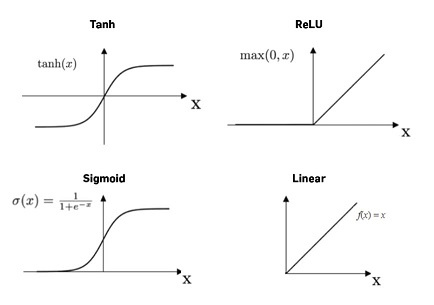

An Artificial Neural Network (ANN) is **trained** using a process called **backpropagation**, which involves **adjusting the weights** of the connections between neurons in the network to minimize the error between the predicted output and the actual output.

The training process typically involves the following steps:

**Initialization**: The weights of the network are initialized randomly.

**Forward propagation**: An input is fed into the network, and the output is calculated by passing it through the layers of neurons using the current weights.

**Calculation of error**: The difference between the predicted output and the actual output is calculated using a loss function.

**Backpropagation**: The error is propagated backwards through the network, and the weights are adjusted to reduce the error. This is done by computing the gradient of the loss function with respect to the weights, and then using this gradient to update the weights using an optimization algorithm such as stochastic gradient descent (SGD).

**Repeat**: Steps 2-4 are repeated with different inputs until the network is able to accurately predict the output for a wide range of inputs.

The training process is typically repeated for many **epochs**, or **iterations**, until the network is able to accurately predict the output for the training data. The network can then be tested on a separate set of data, called the validation set, to ensure that it is able to generalize well to new data. If the validation accuracy is high, the network can be deployed to make predictions on new data.

In [ ]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/1280/1*VF9xl3cZr2_qyoLfDJajZw.gif')

In Python, there are several libraries for implementing Neural Networks.
In this tutorial, we use the Scikit-learn library.

Other libraries such as Keras and Pytorch will be covered in the next tutorial where we learn about deep learning models.

Scikit-learn documentation: [MLP Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html), [MLP Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

In [ ]:
random_state = 42

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=random_state, max_iter = 10000)

## Validating on Validation set
parameters_mlp = {
                  'hidden_layer_sizes': [(10), (10,30), (10,30,10)],
                  'activation': ['tanh', 'relu', 'logistic'],
                  'solver': ['sgd', 'adam'],
                  'learning_rate_init': [0.0001, 0.05]
                  }
cv_method = StratifiedKFold(n_splits=5, shuffle = True, random_state=random_state)
clf_GridSearchCV = GridSearchCV(estimator=model,
                    param_grid=parameters_mlp,
                    cv=cv_method,
                    verbose=2,
                    scoring='accuracy')
clf_GridSearchCV.fit(X_train, np.ravel(y_train))

print('\n')
print(clf_GridSearchCV.best_params_)
print(clf_GridSearchCV.best_score_)

## Evaluating on test set
model.set_params(**clf_GridSearchCV.best_params_)
model = model.fit(X_train, np.ravel(y_train))
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(test_accuracy)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END activation=tanh, hidden_layer_sizes=10, learning_rate_init=0.0001, solver=sgd; total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=10, learning_rate_init=0.0001, solver=sgd; total time=   0.9s
[CV] END activation=tanh, hidden_layer_sizes=10, learning_rate_init=0.0001, solver=sgd; total time=   0.9s
[CV] END activation=tanh, hidden_layer_sizes=10, learning_rate_init=0.0001, solver=sgd; total time=   0.8s
[CV] END activation=tanh, hidden_layer_sizes=10, learning_rate_init=0.0001, solver=sgd; total time=   0.9s
[CV] END activation=tanh, hidden_layer_sizes=10, learning_rate_init=0.0001, solver=adam; total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=10, learning_rate_init=0.0001, solver=adam; total time=   1.1s
[CV] END activation=tanh, hidden_layer_sizes=10, learning_rate_init=0.0001, solver=adam; total time=   1.5s
[CV] END activation=tanh, hidden_layer_sizes=10, learning_rate_init=0.0001, sol

## RBFNN

**RBF** inherently is simply a **function** whose points are defined as **distances from a center**. It is equivalent to the activation functions in ANN.

**RBFNN** stands for Radial Basis Function Neural Network, which is a type of artificial neural network commonly used for classification and regression tasks. The hidden layer of an RBFNN consists of a set of **radial basis functions**, which are used to transform the input data into a higher-dimensional space where it can be more easily separated by a linear classifier.

Each RBF neuron in the hidden layer of RBFNN stores a **“prototype”** (also called **center vector**). When we want to classify a new input, each neuron computes the (**similarity**) Euclidean distance between the input and its prototype. Roughly speaking, if the input more closely resembles the class A prototypes than the class B prototypes, it is classified as class A.

The output of each node in the hidden layer is then fed into a **linear combination of weights** that are learned during the training process. These weights are used to produce the final output of the RBFNN. The weights are learned using a variety of methods, including gradient descent and least-squares regression.

[Ref1](https://towardsdatascience.com/radial-basis-function-neural-network-simplified-6f26e3d5e04d), [Ref2](https://medium.com/dataseries/radial-basis-functions-rbf-kernels-rbf-networks-explained-simply-35b246c4b76c), [Ref3](https://mccormickml.com/2013/08/15/radial-basis-function-network-rbfn-tutorial/)

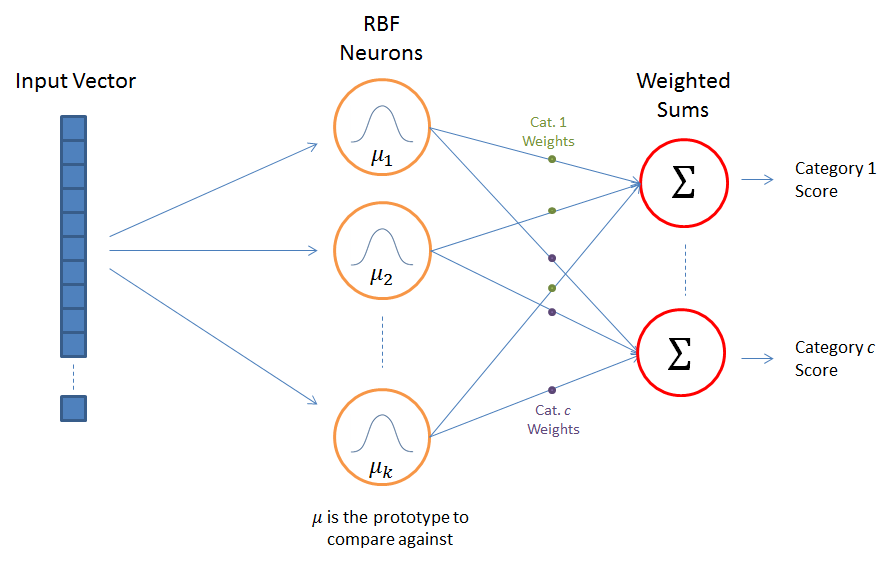
[Ref](https://mccormickml.com/2013/08/15/radial-basis-function-network-rbfn-tutorial/)

One of the most used RBF in RBF networks is the Gaussian RBF. It is a mathematical function that has a **bell-shaped curve**, with the highest point at the **center** of the curve. The equation for a Gaussian function is:




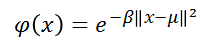

where **mu** is the center of the Gaussian function, and **beta** is a hyper-parameter used to control the width of the bell curve as shown in the figure below. higher Beta means a sharper decline. The Gaussian function takes an input x and computes its distance from the center vector mu. It then applies a nonlinear transformation to the distance, using the width parameter. Input vectors which are more similar to the prototype or center vector of that RBF neuron return a result closer to 1.

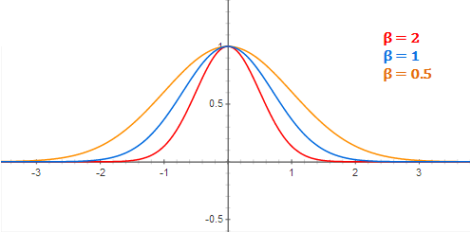

The center vector of the Gaussian functions in an RBFNN are typically determined using a clustering algorithm, such as K-means clustering. The number of center vectors (~ the number of neurons in the hidden layer) is a hyperparameter that needs to be tuned.

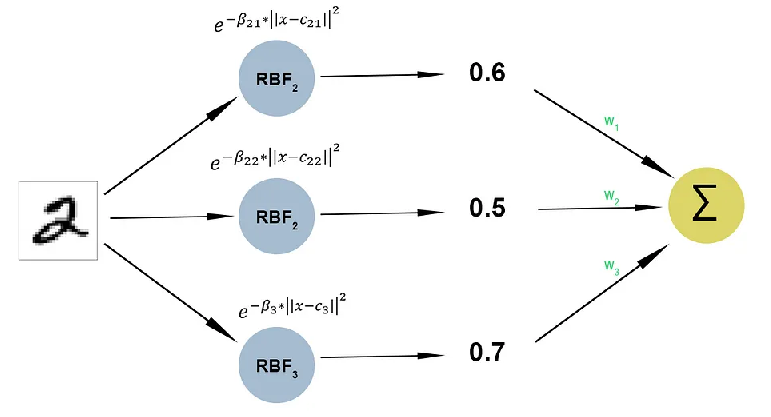
[Ref](https://towardsdatascience.com/most-effective-way-to-implement-radial-basis-function-neural-network-for-classification-problem-33c467803319)

Scikit-learn [rbf_kernel](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.rbf_kernel.html#sklearn.metrics.pairwise.rbf_kernel)

In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.neural_network import MLPClassifier

def fit_rbfnn(x, y, n_hidden, gamma):
    # Step 1: Clustering
    kmeans = KMeans(n_clusters=n_hidden, random_state=42).fit(x) # set a random_state for reproducible results
    centers = kmeans.cluster_centers_

    # Step 2: Computing RBF outputs from the hidden layer neurons
    rbf_outputs = rbf_kernel(x, centers, gamma=gamma)   # rbf_kernel is a function in scikit-learn that computes the Radial Basis Function (RBF) kernel between two sets of vectors.

    # Step 3: Fitting an MLP with RBF kernel
    clf = MLPClassifier(hidden_layer_sizes=(n_hidden,), activation='logistic',  # set a random_state for reproducible results
                        solver='lbfgs', max_iter=10000)
    clf.fit(rbf_outputs, y)
    clf.centers_ = centers
    clf.gamma_ = gamma
    return clf

# Train the RBFNN
rbfnn = fit_rbfnn(X_train, np.ravel(y_train), n_hidden=10, gamma=1)

# Evaluate on test data
rbf_outputs_test = rbf_kernel(X_test, rbfnn.centers_, gamma=rbfnn.gamma_)
y_pred = rbfnn.predict(rbf_outputs_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.97


## PNN

A Probabilistic Neural Network (PNN) is a type of artificial neural network that is commonly used for pattern recognition and classification problems. Unlike other neural networks that learn through the process of backpropagation and gradient descent, PNNs utilize **probability theory** (Bayes' rule) to model and classify patterns.

PNNs consist of **four layers**:

**Input Layer:**
The input layer is the feature vector representation of the input. Normalize the data before feeding it to the network.

**Pattern (Hidden) Layer:**
The number of nodes in this layer is equal to the number of training points in your dataset. For instance, if your training set has 100,000 points, then we'll have 100,000 nodes in this layer. Thus, each node represents a training point. The activation for each node in this layer is the value of Gaussian kernel for the test point centred at that node.


**Summation Layer:**
The number of nodes in this layer is equal to the number of classes. So for two-class classfication, we'll have two nodes. The activation for each node (class) in this layer is the sum of the activations for the nodes in the previous layer for which the node belongs to the particular class. Notice in the diagram how the hidden layer is not fully connected with the summation layer.

**Output layer:** This layer has one node. Nothing happens in this layer really, we just predict as output the class for which the summation layer has the maximum activation value.

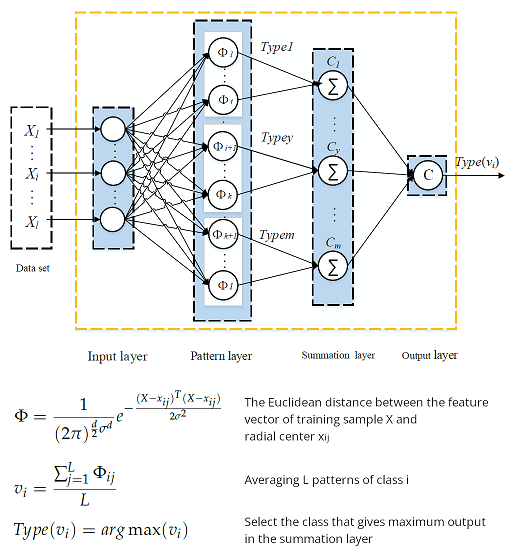

[Source code](https://github.com/vdevmcitylp/probabilistic-neural-network)

In [ ]:
data = {'x_train': X_train,
    'x_test': X_test,
    'y_train': y_train,
    'y_test': y_test}

In [ ]:
# Helper function that combines the pattern layer and summation layer
def rbf(centre, x, sigma):
	centre = centre.reshape(1, -1)
	temp = -np.sum((centre - x) ** 2, axis = 1)
	temp = temp / (2 * sigma * sigma)
	temp = np.exp(temp)
	gaussian = np.sum(temp)
	return gaussian

# A function that splits the training set into subsets where each subset contains data points from a particular class
def subset_by_class(data, labels):
	x_train_subsets = []
	for l in labels:
		indices = np.where(data['y_train'] == l)
		x_train_subsets.append(data['x_train'][indices, :])
	return x_train_subsets


In [ ]:
def PNN(data):

	num_testset = data['x_test'].shape[0] # 200
	labels = np.unique(data['y_train']) # [0,1]
	num_class = len(labels) # 2

	sigma = 0.1

	# Splits the training set into subsets where each subset contains data points from a particular class
	x_train_subsets = subset_by_class(data, labels)

	# Variable for storing the summation layer values from each class
	summation_layer = np.zeros(num_class)

	# Variable for storing the predictions for each test data point
	predictions = np.zeros(num_testset)

	for i, test_point in enumerate(data['x_test']):

		for j, subset in enumerate(x_train_subsets):
			# Calculate summation layer
			summation_layer[j] = np.sum(
				rbf(test_point, subset[0], sigma)) / subset[0].shape[0] # call the 'rbf' function for each class and get the activations for the summation layer

		# The index having the largest value in the summation_layer is stored as the prediction
		predictions[i] = np.argmax(summation_layer)

	return predictions

In [ ]:
y_pred = PNN(data)
y_pred

array([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.])

In [ ]:
# Evaluate the accuracy of the PNN
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.98
